In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [2]:
import requests
from StringIO import StringIO

In [3]:
url="http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

poll_data=StringIO(source)

In [4]:
poll_df=pd.read_csv(poll_data)
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


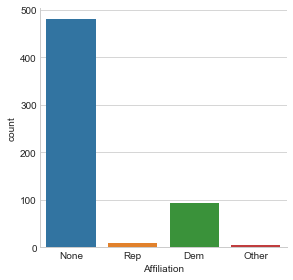

In [5]:
sns.factorplot(x='Affiliation',kind='count',data=poll_df)

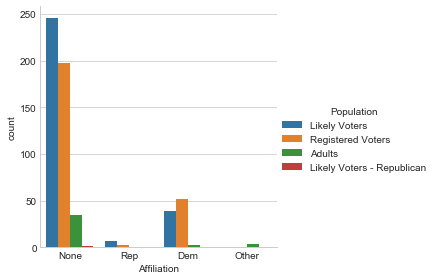

In [6]:
sns.factorplot(x='Affiliation',kind='count',hue='Population',data=poll_df)

In [7]:
avg=pd.DataFrame(poll_df.mean())
avg.drop(['Number of Observations','Question Iteration','Question Text'],axis=0,inplace=True)
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [8]:
std=pd.DataFrame(poll_df.std())
std.drop(['Number of Observations','Question Iteration','Question Text'],axis=0,inplace=True)
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


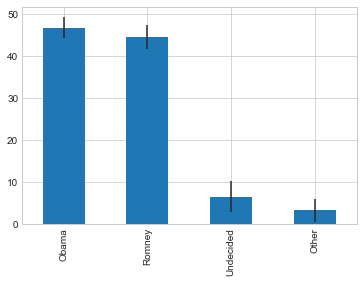

In [9]:
avg.plot(yerr=std,kind='bar',legend=False)

In [10]:
poll_avg=pd.concat([avg,std],axis=1)
poll_avg.columns=['Average','STD']
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


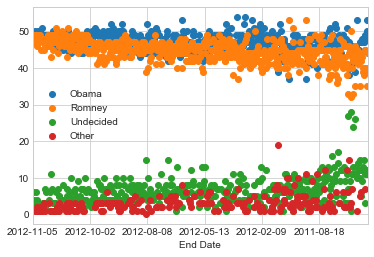

In [11]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided','Other'],linestyle='',marker='o')

In [12]:
poll_df['Difference']=(poll_df.Obama - poll_df.Romney)/100
# +ive leaning towards Obama
# -ive towards Romney

In [13]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [14]:
poll_df=poll_df.groupby('Start Date',as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


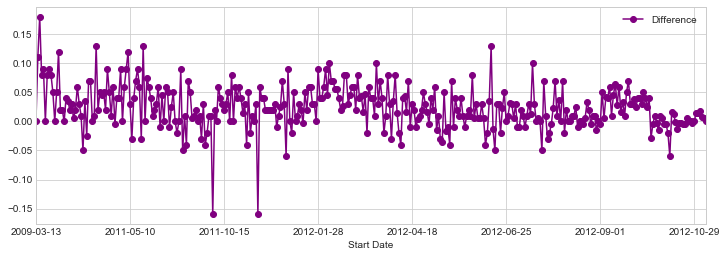

In [15]:
poll_df.plot(x='Start Date',y='Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [16]:
# below code will collect index number for Oct 2012
row_in=0
xlimit=[]
for date in poll_df['Start Date']:
    if date[0:7]=='2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        


325
327
336
346


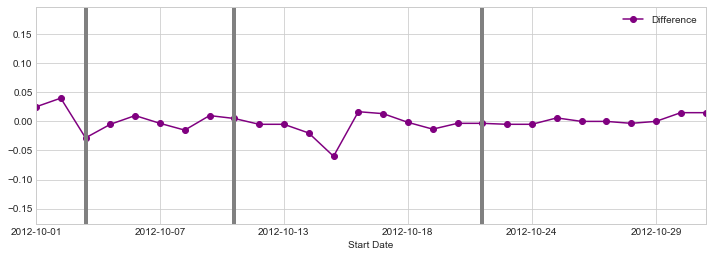

In [17]:
poll_df.plot(x='Start Date',y='Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',
             xlim=(min(xlimit),max(xlimit)))

#debate dates
print min(xlimit)
print min(xlimit)+2
print min(xlimit)+11
print min(xlimit)+21



# Oct 3rd
plt.axvline(x=min(xlimit)+2,linewidth=4,color='grey')

#Oct 11th
plt.axvline(x=333,linewidth=4,color='grey')

#Oct 22nd
plt.axvline(x=343,linewidth=4,color='grey')

In [18]:
#Donor dataset
#https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0

In [19]:
location='/Users/mithleshpatel/anaconda2/zipzap/Data_File/'

In [20]:
donor_df=pd.read_csv(location+'Election_Donor_Data.csv')
donor_df.head()

/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [21]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [22]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
#donor_df['contb_receipt_amt'].median()

In [23]:
print "The average donation was %.2f with STD of %.2f" %(don_mean,don_std)

The average donation was 298.24 with STD of 3749.67


In [24]:
# since the std is very large we will analyse if there are any outliers
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [25]:
# we can see some -ive values which are actually refund amounts and we should get rid of those
top_donor = top_donor[top_donor > 0]

top_donor.sort_values()
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

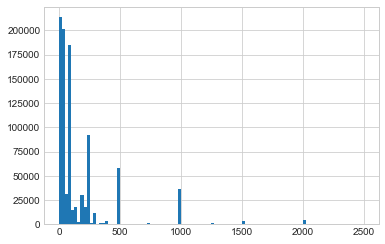

In [26]:
com_don = top_donor[top_donor < 2500]

com_don.hist(bins=100)

In [27]:
top_donor.std()

3764.4829284761277

In [28]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [29]:
# Dictionary of party affiliation

party_map = {'Bachmann, Michelle':'Republican', 
             'Romney, Mitt':'Republican', 
             'Obama, Barack':'Democrat',
             "Roemer, Charles E. 'Buddy' III":'Republican', 
             'Pawlenty, Timothy':'Republican',
             'Johnson, Gary Earl':'Republican', 
             'Paul, Ron':'Republican', 
             'Santorum, Rick':'Republican', 
             'Cain, Herman':'Republican',
             'Gingrich, Newt':'Republican', 
             'McCotter, Thaddeus G':'Republican', 
             'Huntsman, Jon':'Republican',
             'Perry, Rick':'Republican'}

#Now map the party with candidate

donor_df['Party'] = donor_df.cand_nm.map(party_map)


In [30]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [31]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [32]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [33]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [34]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [35]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i=0
for don in cand_amount:
    print 'The candidate %s raised %.0f dollars' %(cand_amount.index[i],don)
    print '\n'
    i += 1

The candidate Bachmann, Michelle raised 2711439 dollars


The candidate Cain, Herman raised 7101082 dollars


The candidate Gingrich, Newt raised 12832770 dollars


The candidate Huntsman, Jon raised 3330373 dollars


The candidate Johnson, Gary Earl raised 566962 dollars


The candidate McCotter, Thaddeus G raised 39030 dollars


The candidate Obama, Barack raised 135877427 dollars


The candidate Paul, Ron raised 21009620 dollars


The candidate Pawlenty, Timothy raised 6004819 dollars


The candidate Perry, Rick raised 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars


The candidate Romney, Mitt raised 88335908 dollars


The candidate Santorum, Rick raised 11043159 dollars




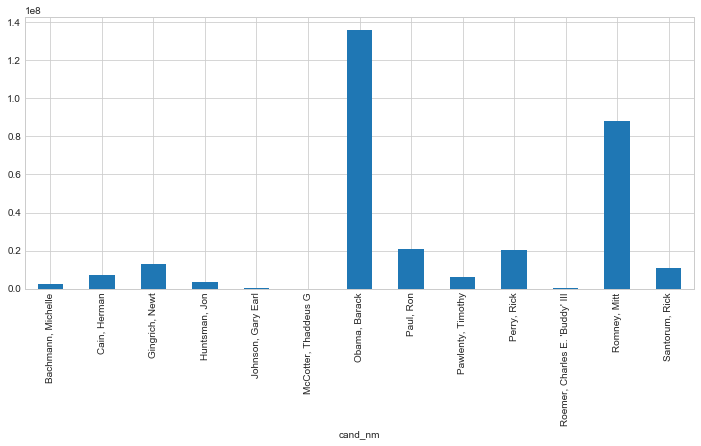

In [36]:
cand_amount.plot(kind='bar',figsize=(12,5))

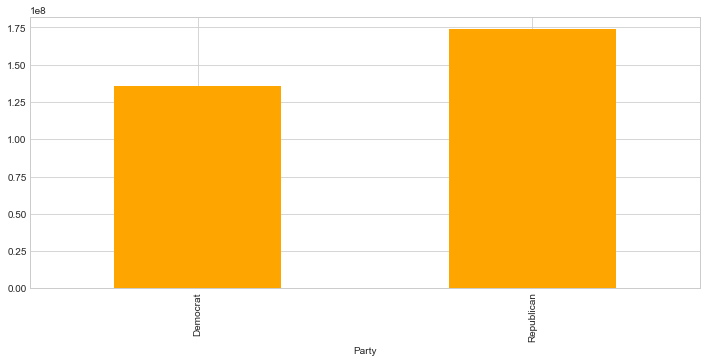

In [37]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar',figsize=(12,5),color='orange')

In [38]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index='contbr_occupation',
                                    columns='Party',
                                    aggfunc='sum')

In [39]:
occupation_df.shape

(45067, 2)

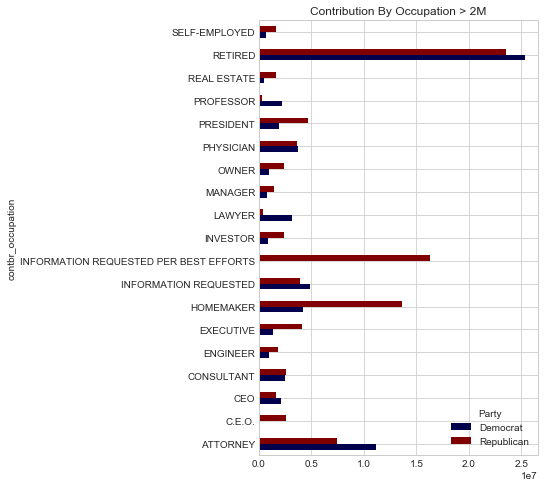

In [49]:
occupation_df = occupation_df[occupation_df.sum(1) > 2000000]
occupation_df.plot(kind='barh',figsize=(5,8),title='Contribution By Occupation > 2M',cmap='seismic',sort_columns=True)

In [50]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [52]:
occupation_df.loc['CEO']=occupation_df.loc['CEO']+occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.',inplace=True)

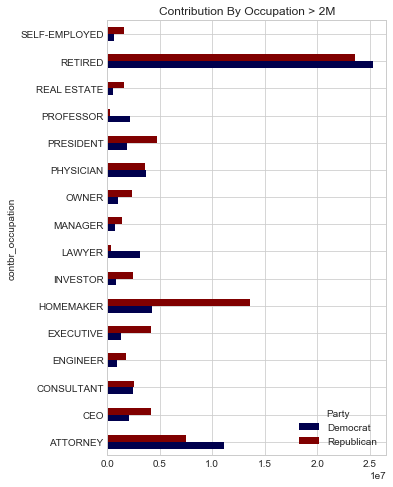

In [53]:
occupation_df.plot(kind='barh',figsize=(5,8),title='Contribution By Occupation > 2M',cmap='seismic',sort_columns=True)